<a href="https://colab.research.google.com/github/extrajp2014/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module3-gradient-descent/Gradient_Descent_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent Implementation Challenge!!

## Use gradient descent to find the optimal parameters of a **multiple** regression model. (We only showed an implementation for a bivariate model during lecture.)

A note: Implementing gradient descent in any context is not trivial, particularly the step where we calculate the gradient will change based on the number of parameters that we're trying to optimize for. You will need to research what the gradient of a multiple regression model looks like. This challenge is pretty open-ended but I hope it will be thrilling. Please work together, help each other, share resources and generally expand your understanding of gradient descent as you try and achieve this implementation. 

## Suggestions:

Start off with a model that has just two $X$ variables You can use any datasets that have at least two $x$ variables. Potential candidates might be the blood pressure dataset that we used during lecture on Monday: [HERE](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls) or any of the housing datasets. You would just need to select from them the two $x$ variables and one $y$ variable that you want to work with. 

Use Sklearn to find the optimal parameters of your model first. (like we did during the lecture.) So that you can compare the parameter estimates of your gradient-descent linear regression to the estimates of OLS linear regression. If implemented correctly they should be nearly identical.

Becoming a Data Scientist is all about striking out into the unknown, getting stuck and then researching and fighting and learning until you get yourself unstuck. Work together! And fight to take your own learning-rate fueled step towards your own optimal understanding of gradient descent! 


In [0]:

from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
pd.options.display.float_format = '{:,}'.format

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv') 


-----Standard Linear Regression-------
beta_1:  [14690.61232484 19480.4616011 ]
beta_0:  [180921.19589041]

------MultigradientDescent v2.0------
[[180913.3852967   14690.63146119  19479.90541239]]

finalCost: 2827137279.4628644


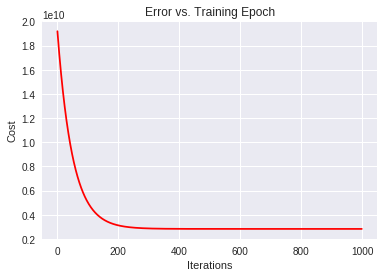

In [3]:
# "Multiple Variables" Gradient Descent Version
################################ 
# https://medium.com/we-are-orb/multivariate-linear-regression-in-python-without-scikit-learn-7091b1d45905

# data source
temp = df[list(df.select_dtypes(include=[np.number]))].copy()
temp.fillna(0, inplace=True)

# normalize the features using mean normalization
# temp = (temp - temp.mean())/temp.std() - be careful with this, CAUSE unequal beta0 and beta1 between methods!

# Create matrices
# Set X, y, theta values for Gradient Descent - Multivariate
X = temp[['LotFrontage','LotArea']]
y = temp[['SalePrice']].values

# y = temp.loc[:, ['SalePrice']].values

# Normalize X values
X = (X - X.mean()) / X.std()
# Turn X into a matrix by stacking the arrays
# ones = np.ones([X.shape[0],1])
# X_linalg = np.concatenate((ones,X),axis=1)
X_linalg = np.concatenate((np.ones([X.shape[0],1]),X),axis=1)


# Linear Regression Method
################################ 
def linear_regression_std(X,y):
  model = LinearRegression()
  model.fit(X, y)
  # Assign coefficient and intercept to variables (beta_1, and beta_0)
  beta_1 = model.coef_[0]
  beta_0 = model.intercept_
  print("-----Standard Linear Regression-------")
  print("beta_1: ", beta_1)
  print("beta_0: ", beta_0)
linear_regression_std(X,y)
print("")


#Gradient Descent Method
################################ 
# set hyper parameters
alpha = 0.01
iters = 1000
# Other Important Variables
n = y.size
np.random.seed(42)
theta = np.zeros([1,3]) # set 0 for null theta

# computecost
# gradient descent to minimize this cost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))


# blog function
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    return theta,cost

#running the gd and cost function
print("------MultigradientDescent v2.0------")
g,cost = gradientDescent(X_linalg,y,theta,iters,alpha)
print(g)
print("")
finalCost = computeCost(X_linalg,y,g)
print('finalCost:',finalCost)

#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')
plt.show()

-----Standard Linear Regression-------
beta_1:  16647.34676255992
beta_0:  180921.19589041095

-----Bivariate Gradient-Descent-------
beta_1:  16647.346731533326
beta_0:  180921.1955532178



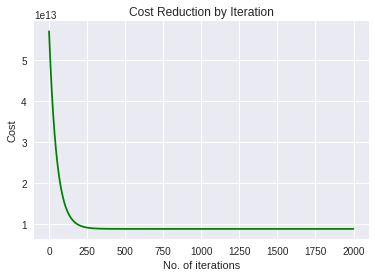

In [4]:
# Bivariate Gradient Descent
################################ 

temp = df[list(df.select_dtypes(include=[np.number]))].copy()
temp.fillna(0, inplace=True)

# normalize the features using mean normalization
# temp = (temp - temp.mean())/temp.std()

# Create matrices
# Set X, y, theta values for Gradient Descent - Multivariate
X = temp['LotFrontage'].values[:, np.newaxis]
y = temp['SalePrice'].values
# Normalize X values
X = (X - X.mean()) / X.std()
# Turn X into a matrix by stacking the arrays
X_linalg = np.c_[np.ones(X.shape[0]), X] 
# Create y variable list

# Linear Regression Method - No Training
################################ 
def linear_regression_std(X,y):
  model = LinearRegression()
  model.fit(X, y)
  # Assign coefficient and intercept to variables (beta_1, and beta_0)
  beta_1 = model.coef_[0]
  beta_0 = model.intercept_
  print("-----Standard Linear Regression-------")
  print("beta_1: ", beta_1)
  print("beta_0: ", beta_0)
linear_regression_std(X,y)
print("")

# Bivariate Gradient-Descent Method
################################ 
# Set hyperparameters
alpha = .01
iterations = 2000
n = len(y)
np.random.seed(42)
theta = [0,0]

def gradient_descent(x, y, theta, iterations, alpha):
  past_costs = []
  for i in range(iterations):
    prediction = np.dot(X_linalg, theta)
    error = prediction - y
    theta = theta - (alpha * (1/n)*np.dot(X_linalg.T, error))
    cost = np.dot(error.T, error)
    past_costs.append(cost)
  return theta, past_costs

theta, past_costs = gradient_descent(X_linalg, y, theta, iterations, alpha)
print("-----Bivariate Gradient-Descent-------")
print("beta_1: ", theta[1])
print("beta_0: ", theta[0])
print("")

#plot the cost
plt.plot(past_costs,c='g')
plt.title('Cost Reduction by Iteration')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.show()

## Stretch Goals

If you happen upon the most useful resources for accomplishing this challenge first, I want you to spend time today studying other variations of Gradient Descent-Based Optimizers. A good list of the most common optimizers can be found in the Keras Documentation: <https://keras.io/optimizers/>

- Try and write a function that can perform gradient descent for arbitarily large (in dimensionality) multiple regression models. 
- Create a notebook for yourself exploring the different gradient descent based optimizers.
- How do the above differ from the "vanilla" gradient descent we explored today?
- How do these different gradient descent-based optimizers seek to overcome the challenge of finding the global minimum among various local minima?
- Write a blog post that reteaches what you have learned about these other gradient descent-based optimizers.

[Overview of GD-based optimizers](http://ruder.io/optimizing-gradient-descent/)

[Siraj Raval - Evolution of Gradient Descent-Based Optimizers](https://youtu.be/nhqo0u1a6fw)